<a href="https://colab.research.google.com/github/patidemitroff/PyPati/blob/main/Grupo16_PBL_1TSCOEAD_Fase5_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sympy as smp
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns

# Subir a massa de dados

In [3]:
vendas_2019 = pd.read_csv('/content/vendas_linha_petshop_2019.csv',
                              sep = ';',
                              encoding='latin1',
                              decimal=',')

In [4]:
vendas_2020 = pd.read_csv('/content/vendas_linha_petshop_2020.csv',
                              sep = ';',
                              encoding='latin1',
                              decimal=',')

In [5]:
vendas_2021 = pd.read_csv('/content/vendas_linha_petshop_2021.csv',
                              sep = ';',
                              encoding='latin1',
                              decimal=',')

In [6]:
vendas_2022 = pd.read_csv('/content/vendas_linha_petshop_2022.csv',
                              sep = ';',
                              encoding='latin1',
                              decimal=',')

In [7]:
#Concatenar as 4 tabelas
vendas = pd.concat([vendas_2019, vendas_2020, vendas_2021, vendas_2022], ignore_index=True)
vendas

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,1,Norte,Biscoito True Champion 300g,22.00,2.0,44.00,13/06/2019,Acre,Dinheiro,Rapid Pink,Carlos,0.44,17.6,Alimentação
1,2,Norte,Biscoito True Champion 300g,21.00,2.0,42.00,03/01/2019,Amapá,Pix,Rapid Pink,Maria Linda,0.42,16.8,Alimentação
2,3,Norte,Biscoito True Champion 300g,22.00,NaN,44.00,18/01/2019,Pará,Boleto Bancário,Rapid Pink,Julia,0.88,35.2,Alimentação
3,4,Norte,Biscoito True Champion 300g,19.00,4.0,88.00,19/08/2019,Rondônia,Boleto Bancário,Rapid Pink,Yuri,0.76,30.4,Alimentação
4,5,Norte,Biscoito True Champion 300g,22.00,2.0,44.00,18/10/2019,Tocantins,Cartão Crédito,Rapid Pink,Dolores,0.44,17.6,Alimentação
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200781,200976,Sudeste,Bandana Disney Mickey Fábrica Petti,19.44,3.0,58.32,07/02/2022,Rio de Janeiro,Cartão Débito,Papa Léguas,Antonio,0.42,14.7,Acessório
200782,200977,Sudeste,Bandana Disney Mickey Fábrica Petti,21.06,1.0,21.06,06/02/2022,Espírito Santo,Cartão Débito,Papa Léguas,Tereza,0.26,9.1,Acessório
200783,200978,Sul,Bandana Disney Mickey Fábrica Petti,14.58,3.0,43.74,25/01/2022,Paraná,Cartão Crédito,Tree True,Beatriz,0.48,16.8,Acessório
200784,200979,Sul,Bandana Disney Mickey Fábrica Petti,16.20,2.0,32.40,27/03/2022,Santa Catarina,Pix,Tree True,Vitória,0.52,18.2,Acessório


# Análise exploratória

In [ ]:
#Avaliar data types
vendas.dtypes

cod_pedido               int64
regiao_pais             object
produto                 object
valor                  float64
quantidade              object
valor_total_bruto      float64
data                    object
estado                  object
formapagto              object
centro_distribuicao     object
responsavelpedido       object
valor_comissao         float64
lucro_liquido          float64
categoriaprod           object
dtype: object

In [10]:
#checar campos null existentes para 'quantidade'
vendas['quantidade'].isnull().sum()

520

In [11]:
#como o campo 'quantidade' não era um campo numerico e haviam muitos campos null,
# convertemos o campo em numerico e tratamos os campos invalidos
vendas['quantidade'] = pd.to_numeric(vendas['quantidade'], errors='coerce')

In [12]:
#Para encontrar outliers, vamos calcular o intervalo entre 2 quartis
Q1 = vendas['quantidade'].quantile(0.25)
Q2 = vendas['quantidade'].quantile(0.75)
IQR = Q2 - Q1
IQR

1.0

In [21]:
#PARA ESTABELECER LIMITE, CALCULAR MEDIANA
mediana_geral_quantidade = vendas['quantidade'].median()
mediana_geral_quantidade

1.0

In [24]:
#estabelecer um limite para identificar outliers (2)
limite_inferior = Q1 - 2 * IQR
limite_superior = Q2 + 2 * IQR

In [25]:
# Identificar outliers
outliers = vendas[(vendas['quantidade'] < limite_inferior) | (vendas['quantidade'] > limite_superior)]
("Outliers:")
(outliers)

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
30,31,Norte,Bola Pet Vinil Big Blue,21.00,71.0,1491.00,21/12/2019,Roraima,Cartão Débito,Rapid Pink,Adriana,14.91,596.4,Brinquedo
156,157,Norte,Roupa para Cão Billaboard,32.00,70.0,2240.00,22/07/2019,Amazonas,Cartão Débito,Rapid Pink,Silvia,23.80,1309.0,Acessório
165,166,Nordeste,Roupa para Cão Billaboard,43.00,70.0,3010.00,20/03/2019,Paraíba,Boleto Bancário,Gold Beach,Cristina,25.20,1386.0,Acessório
183,184,Centro Oeste,Vitamina E Granulado BigForce,72.00,70.0,5040.00,13/06/2019,Mato Grosso,Pix,Grãos Blue,Andressa,53.20,2926.0,Medicamento
228,229,Sudeste,Suplemento Alimentar Glutamina Mundo Animal Nu...,43.00,72.0,3096.00,04/10/2019,Espírito Santo,Cartão Débito,Papa Léguas,Tereza,23.04,1267.2,Medicamento
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200511,200706,Norte,Bebedouro e Comedouro Automático para Cães e G...,69.66,44.0,3065.04,27/02/2022,Acre,Dinheiro,Rapid Pink,Carlos,52.80,880.0,Bebedouros e Comedouros
200571,200766,Centro Oeste,Ração Royal Canin Club Performance para Cães A...,346.68,45.0,15600.60,07/04/2022,Distrito Federal,Pix,Grãos Blue,Lucia,190.80,3816.0,Alimentação
200579,200774,Sudeste,Ração Royal Canin Club Performance para Cães A...,353.16,42.0,14832.72,01/03/2022,São Paulo,Pix,Papa Léguas,Miriam,180.60,3612.0,Alimentação
200605,200800,Sudeste,"Ração Royal Canin Exigent Gatos Adultos 1,5Kg",153.90,43.0,6617.70,27/02/2022,Minas Gerais,Cartão Crédito,Papa Léguas,Monique,87.72,2193.0,Alimentação


# 2.1. Análise

Foram identificados 6246 pedidos com quantidades acima da média (outliers). A média geral de produtos foi definida com base em limites que, por sua vez, foram definidos com base na mediana, sendo que a definição de outliers são pedidos realizados com quantidades com pelo menos 1 produto acima do limite.

# Identificar Outliers

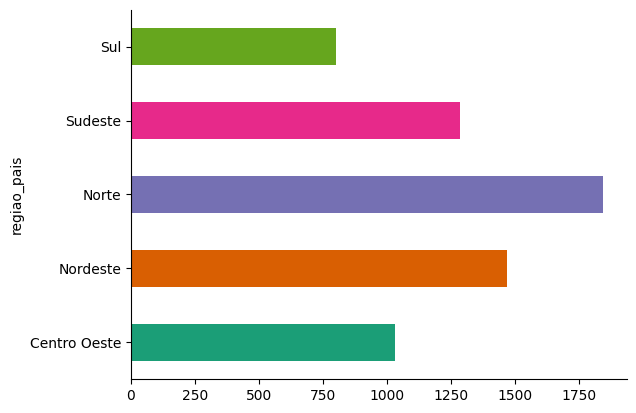

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
outliers.groupby('regiao_pais').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

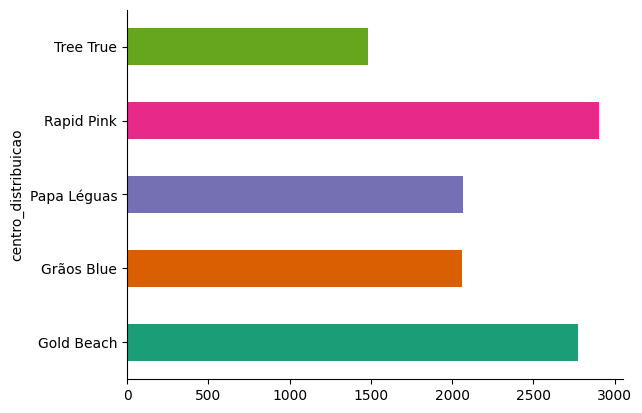

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
outliers.groupby('centro_distribuicao').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Desvio Médio Absoluto

In [33]:
#Calculo de medida de variabilidade desconsiderando outliers: Desvio padrão absoluto

#Aqui, vamos verificar o Desvio médio considerando as variáveis quantidade e preço total bruto
desvio_medio_quantidade = vendas['quantidade'].std()
desvio_medio_valor_total_bruto = vendas['valor_total_bruto'].std()

In [34]:
print(f"Desvio médio da quantidade: {desvio_medio_quantidade}")
print(f"Desvio médio do valor total bruto: {desvio_medio_valor_total_bruto}")

Desvio médio da quantidade: 12.045056839955357
Desvio médio do valor total bruto: 10217.252299434387


# 2.2. Análise

- Cerca de 6 mil registros (ou 3,2% dos pedidos) são outliers e possuem mais itens do que o comum

- Essas vendas são, em sua maioria:
   - de itens de alimentação
   - em sua maioria, do Sudeste e Norte do país
   - a maior parte saem de 2 centros de distribuição específicos

- A variação da quantidade de produtos adquiridos por compra efetuada é de 12 itens por compra, ignorando os outliers (desvio médio absoluto).

- Em termos de valores brutos, a variação chega a 10.217, também ignorando outliers (desvio médio absoluto).



# Calcula a média de preço da população para cada ano

In [42]:
media_preco_2019 = vendas_2019['valor'].mean()
print(media_preco_2019)

87.63387228287891


In [43]:
media_preco_2020 = vendas_2020['valor'].mean()
print(media_preco_2020)

97.9981105631975


In [44]:
media_preco_2021 = vendas_2021['valor'].mean()
print(media_preco_2021)


116.75660315111769


In [45]:
media_preco_2022 = vendas_2022['valor'].mean()
print(media_preco_2022)

141.87574285714285


# População por região

In [48]:
#Dados populacionais obtidos a partir do último Censo 2022 por região
populacao = {
    "Região": ["Sudeste", "Região Nordeste", "Região Sul", "Região Norte", "Região Centro-Oeste"],
    "População": [84847187, 54644582, 29933315, 17349619, 16287809]}


In [51]:
df_populacao = pd.DataFrame(populacao)
print(df_populacao)

                Região  População
0              Sudeste   84847187
1      Região Nordeste   54644582
2           Região Sul   29933315
3         Região Norte   17349619
4  Região Centro-Oeste   16287809


In [41]:
tab_media_preco_populacao = pd.DataFrame({
    'Vendas 2019': media_preco_populacao_2019,
    'Vendas 2020': media_preco_populacao_2020,
    'Vendas 2021': media_preco_populacao_2021,
    'Vendas 2022': media_preco_populacao_2022,
    }, index=pd.MultiIndex.from_tuples([('2019'), ('2020'), ('2021'), ('2022')]))
tab_media_preco_populacao

Vendas 2019  Vendas 2020  Vendas 2021  Vendas 2022
2 0 1 9    87.633872    97.998111   116.756603   141.875743
    2 0    87.633872    97.998111   116.756603   141.875743
      1    87.633872    97.998111   116.756603   141.875743
      2    87.633872    97.998111   116.756603   141.875743

3) Em relação à média de preço, há diferença estatisticamente significativa entre a média de preço de alguma região e a média da população?
E em relação à média de preço de alguma modalidade de pagamento e à média da população?
Justifique a hipótese

 >>> PRECISAMOS CRUZAR PREÇO COM POPULACAO / REGIAO
 E CRUZAR PRECO COM METODO DE PAGAMENTO E POPULACAO

 **REFAZER A MEDIA DE PRECO, AO INVES DE CALCULAR MEDIA POR ANO, CALCULAR MEDIA POR REGIAO**